In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# FFT Feature Importance

In [3]:
infile = open('./outputs/classification/inter-subject/Fold1_FrequencyAll_RandomForest_320.pickle', 'rb')
clf_oputput = pickle.load(infile)
infile.close()

best_RF = clf_oputput['clf_best']
RF_feature_importance = best_RF.feature_importances_
trees_feature_importance = [tree.feature_importances_ for tree in best_RF.estimators_]
feature_importance_std = np.std(trees_feature_importance, axis=0)
important_Idxs = np.argsort(RF_feature_importance)[::-1]
important_Idxs_30 = important_Idxs[:30]

featureNames_ = ['Coef ' + str(i+1) + ' X' for i in range(100)] + ['Coef ' + str(i+1) + ' Y' for i in range(100)] + ['Coef ' + str(i+1) + ' Z' for i in range(100)]
featureNames = np.array(featureNames_)
important_featureNames = featureNames[important_Idxs_30][::-1]

## Bar Graph for RF Feature Importance

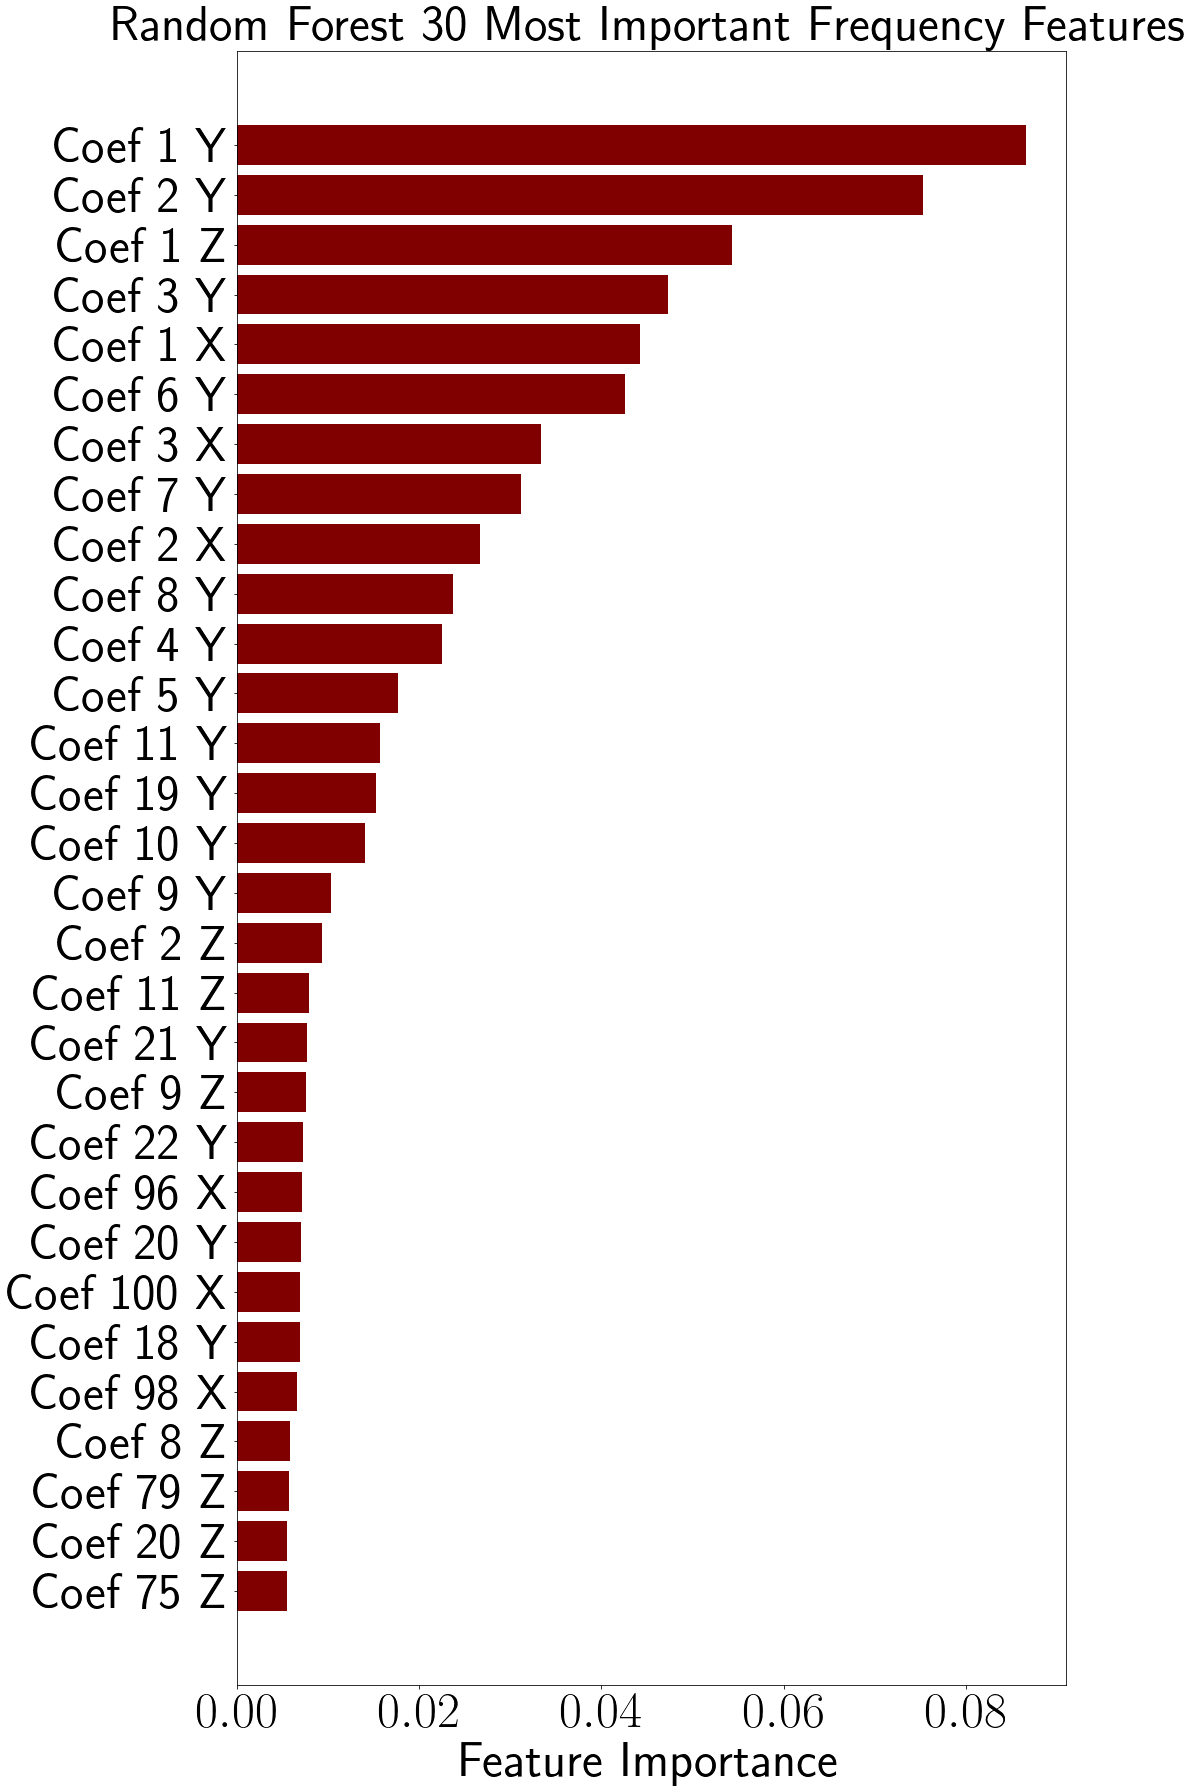

In [4]:
rc('text', usetex=True)
f, ax = plt.subplots(1,1, figsize=(15,25))
y_pos = np.arange(important_Idxs_30.shape[0])
ax.barh(y_pos, RF_feature_importance[important_Idxs_30][::-1], color='maroon')#, xerr=importance_std[important_Idxs_30][::-1])
ax.set_yticks(y_pos)
ax.set_yticklabels(important_featureNames)

ax.set_title('Random Forest 30 Most Important Frequency Features', fontsize=50)
ax.set_xlabel('Feature Importance', fontsize=50)
# ax.set_ylabel('Most Frequently Selectd Features', fontsize=30)
ax.tick_params(labelsize=50)

f.tight_layout()
f.savefig('./outputs/overall_feature_importance/FFT.png')

plt.show()

# Wavelet Feature Importance

In [5]:
infile = open('./outputs/classification/inter-subject/Fold1_TimeFrequency_RandomForest_320.pickle', 'rb')
clf_oputput = pickle.load(infile)
infile.close()

best_RF = clf_oputput['clf_best']
RF_feature_importance = best_RF.feature_importances_
trees_feature_importance = [tree.feature_importances_ for tree in best_RF.estimators_]
feature_importance_std = np.std(trees_feature_importance, axis=0)
important_Idxs = np.argsort(RF_feature_importance)[::-1]
important_Idxs_15 = important_Idxs[:15]

featureNames_ = []
for i in ['X', 'Y', 'Z']:
    for j in ['Approx-5', 'Deatil-5', 'Detail-4', 'Detail-3', 'Detail-2', 'Detail-1']:
        for k in ['Mean', 'RMS', 'MAD', 'STD', 'Min', 'Max', 'Median', '25-Perc', '75-Perc', 'Entropy',
                  '0-Cross', 'Mean-Cross']:
            featureNames_.append(k + ' ' + j + ' ' + i)
featureNames = np.array(featureNames_)
important_featureNames = featureNames[important_Idxs_15][::-1]

## Bar Graph for RF Feature Importance

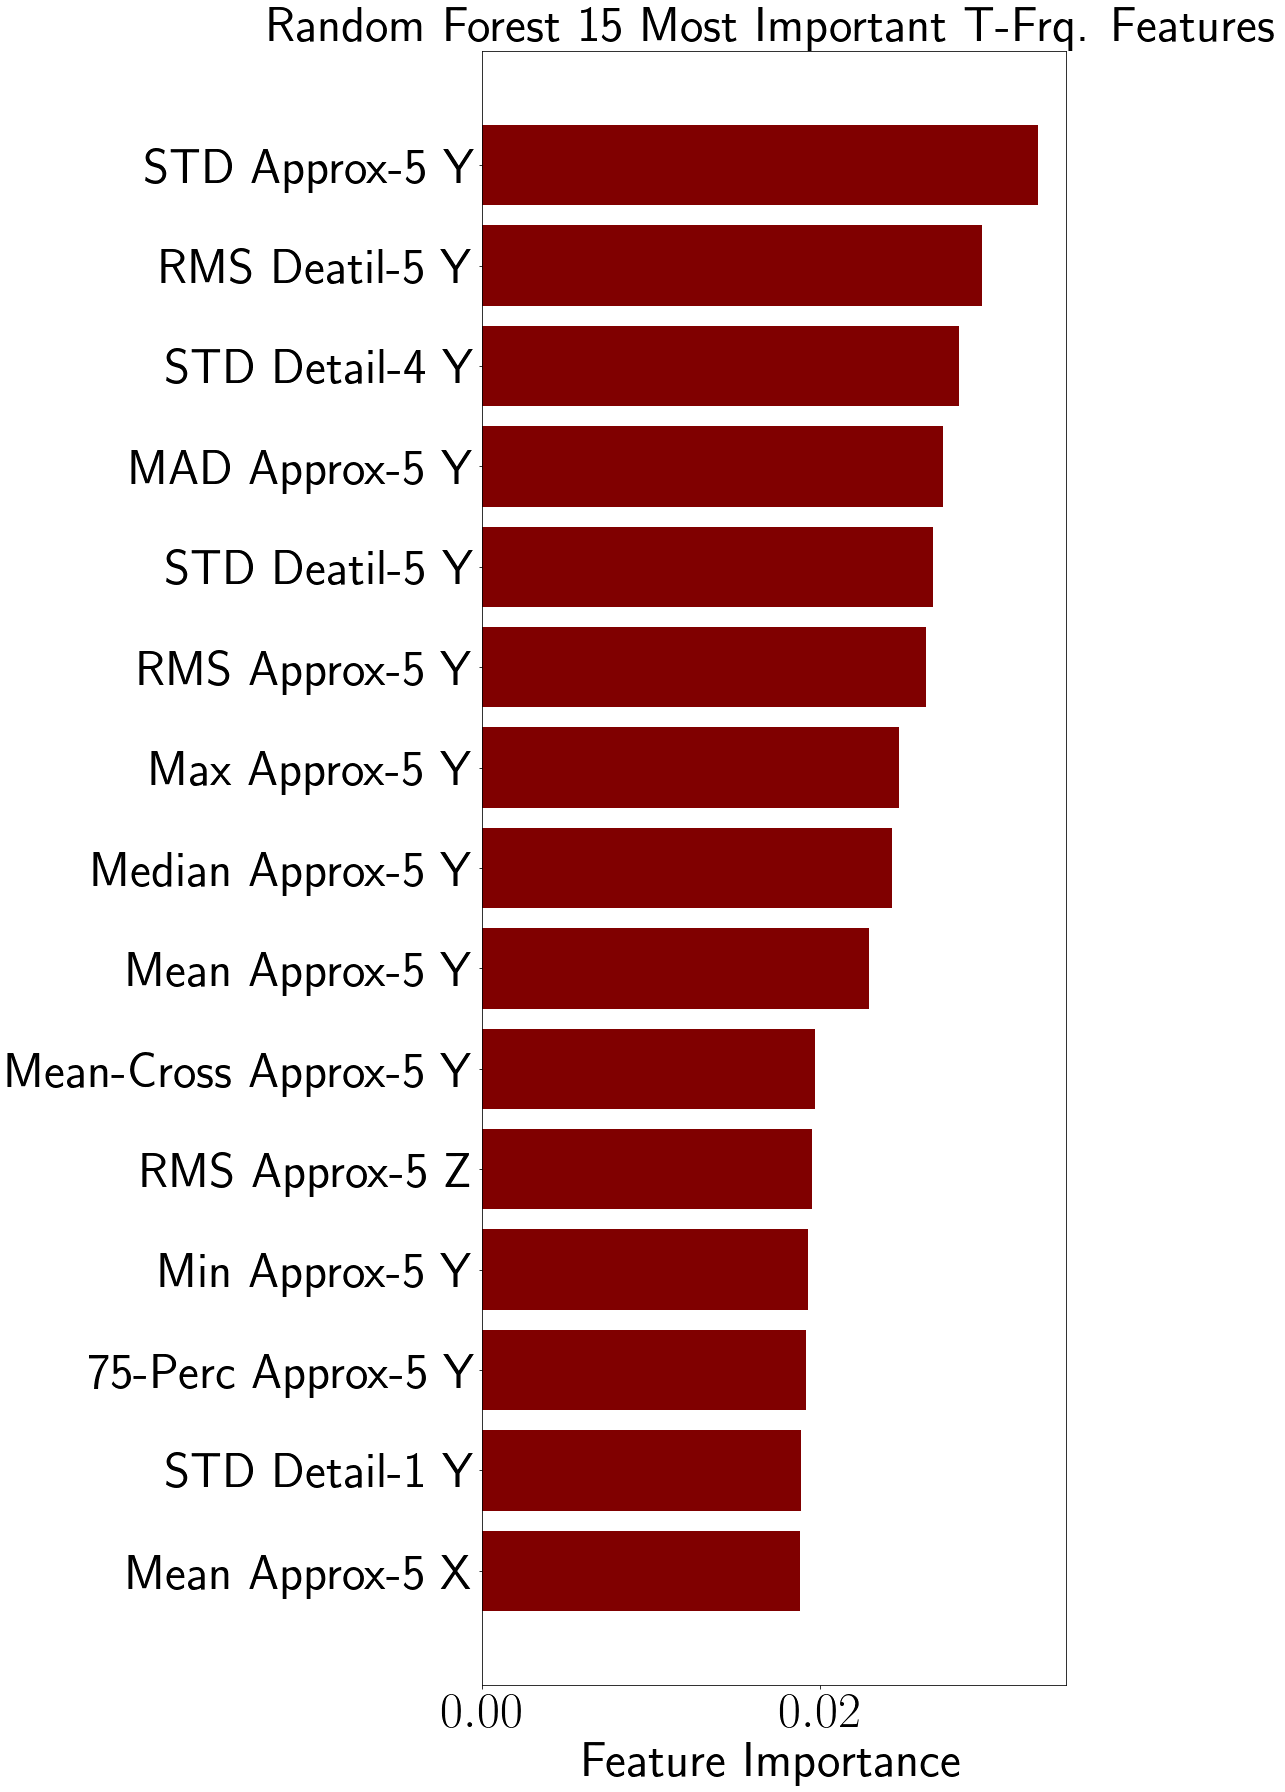

In [6]:
rc('text', usetex=True)
f, ax = plt.subplots(1,1, figsize=(15,25))
y_pos = np.arange(important_Idxs_15.shape[0])
ax.barh(y_pos, RF_feature_importance[important_Idxs_15][::-1], color='maroon')#, xerr=importance_std[important_Idxs_30][::-1])
ax.set_yticks(y_pos)
ax.set_yticklabels(important_featureNames)
ax.set_title('Random Forest 15 Most Important T-Frq. Features', fontsize=50)
ax.set_xlabel('Feature Importance', fontsize=50)
# ax.set_ylabel('Most Frequently Selectd Features', fontsize=50)
ax.tick_params(labelsize=50)
f.tight_layout()
f.savefig('./outputs/overall_feature_importance/Wavelet.png')
plt.show()

# Time Feature Importance

In [7]:
infile = open('./outputs/classification/inter-subject/Fold1_Time_RandomForest_320.pickle', 'rb')
clf_oputput = pickle.load(infile)
infile.close()

best_RF = clf_oputput['clf_best']
RF_feature_importance = best_RF.feature_importances_
trees_feature_importance = [tree.feature_importances_ for tree in best_RF.estimators_]
feature_importance_std = np.std(trees_feature_importance, axis=0)
important_Idxs = np.argsort(RF_feature_importance)[::-1]

featureNames_ = []
for i in ['X', 'Y', 'Z']:
    for j in ['Mean', 'RMS', 'MAD', 'STD', 'Min', 'Max', 'Median', '25-Perc', '75-Perc']:
        featureNames_.append(j + ' ' + i)
featureNames = np.array(featureNames_)
important_featureNames = featureNames[important_Idxs][::-1]

## Bar Graph for RF Feature Importance

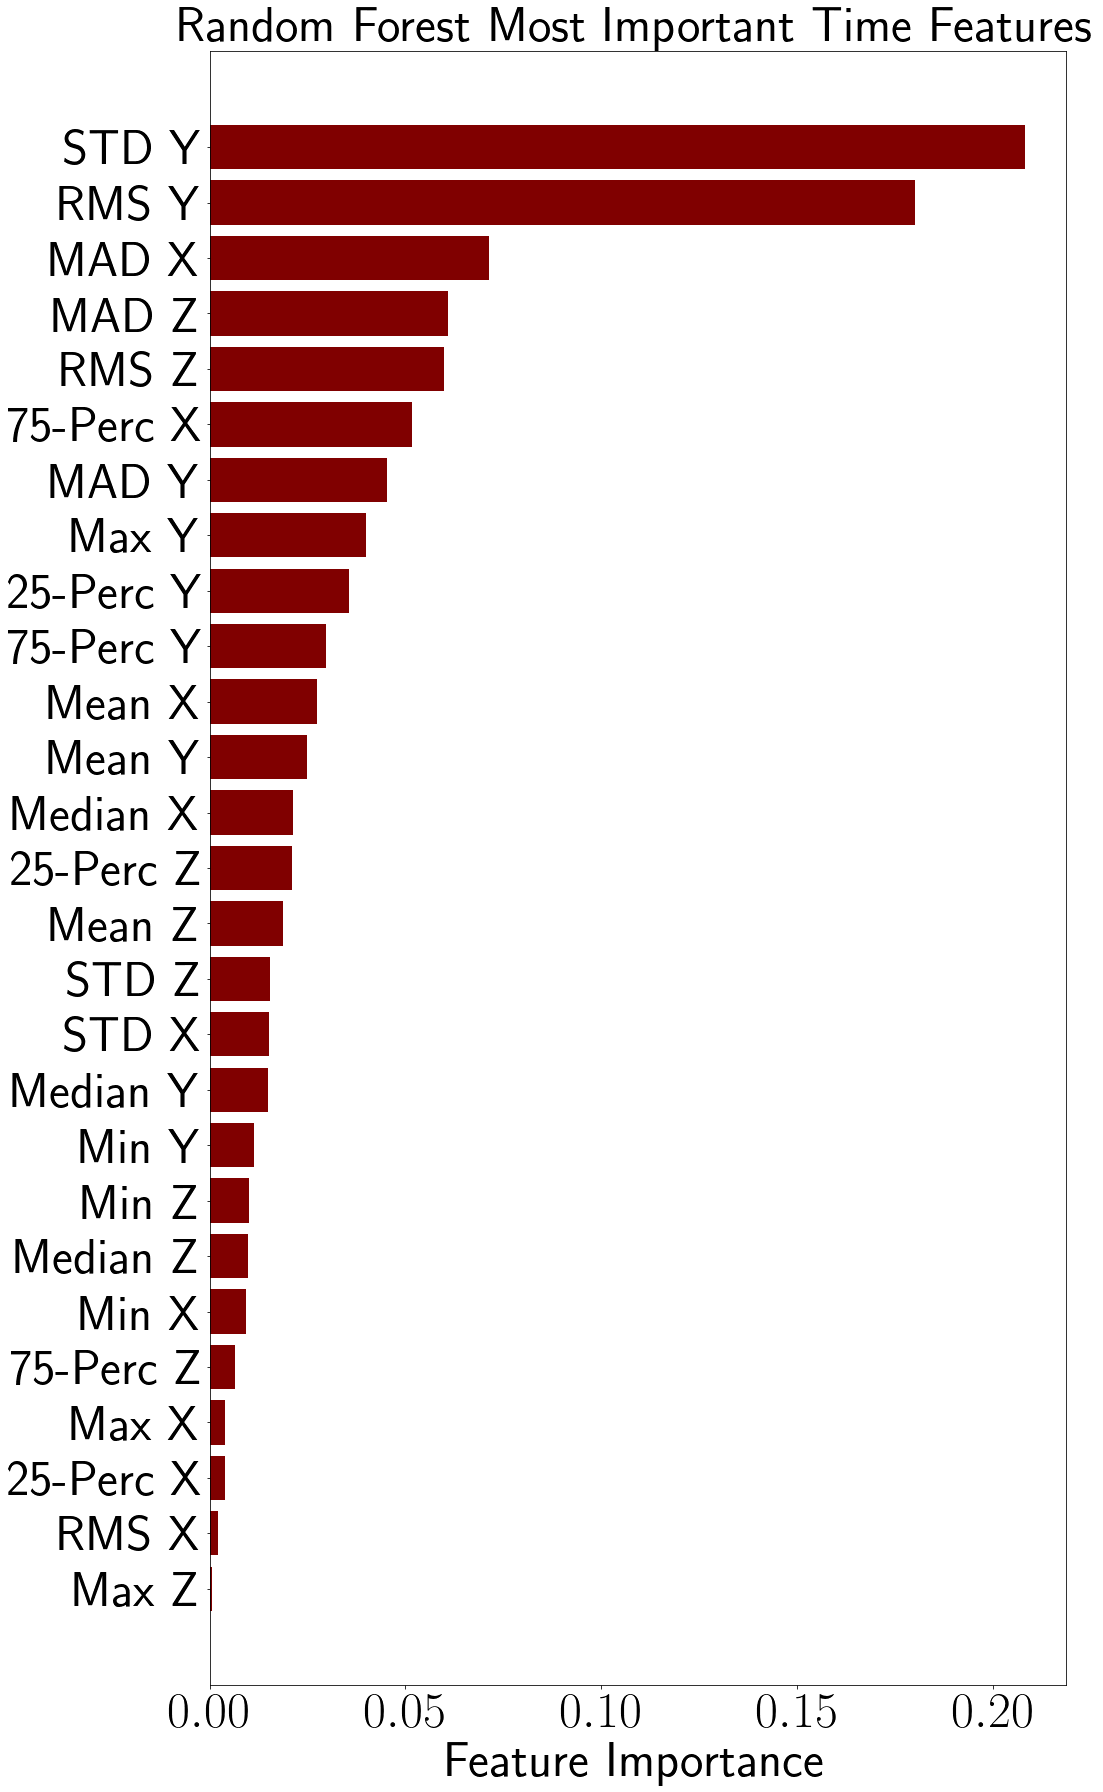

In [8]:
rc('text', usetex=True)
f, ax = plt.subplots(1,1, figsize=(15,25))
y_pos = np.arange(important_Idxs.shape[0])
ax.barh(y_pos, RF_feature_importance[important_Idxs][::-1], color='maroon')#, xerr=importance_std[important_Idxs_30][::-1])
ax.set_yticks(y_pos)
ax.set_yticklabels(important_featureNames)
ax.set_title('Random Forest Most Important Time Features', fontsize=50)
ax.set_xlabel('Feature Importance', fontsize=50)
# ax.set_ylabel('Most Frequently Selectd Features', fontsize=30)
ax.tick_params(labelsize=50)
f.tight_layout()
f.savefig('./outputs/overall_feature_importance/Time.png')
plt.show()